In [1]:
import pandas as pd
import warnings
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

df=pd.concat([train,test],sort=False)

In [2]:
df.isnull().sum()

id                   0
position             0
age                  0
area                 0
sex                  0
partner              0
num_child            0
education            0
service_length       0
study_time           0
commute              0
overtime             0
salary            9000
dtype: int64

In [3]:
for i in df.columns:
    print(i)
    print(df[i].unique())


id
[    0     1     2 ... 20997 20998 20999]
position
[1 2 0 3 4]
age
[44 31 36 22 25 23 32 21 43 46 27 50 24 35 26 33 39 48 29 41 55 40 20 53
 34 42 52 45 56 49 47 28 54 30 37 18 51 38 19 57 59 63 58 61 62 65 60 66
 67 64]
area
['愛知県' '奈良県' '山口県' '東京都' '鹿児島県' '兵庫県' '神奈川県' '宮城県' '茨城県' '岩手県' '鳥取県' '岡山県'
 '愛媛県' '新潟県' '島根県' '和歌山県' '高知県' '石川県' '熊本県' '埼玉県' '佐賀県' '香川県' '宮崎県' '福島県'
 '大阪府' '大分県' '岐阜県' '長崎県' '広島県' '北海道' '富山県' '山形県' '徳島県' '青森県' '千葉県' '滋賀県'
 '沖縄県' '三重県' '長野県' '京都府' '栃木県' '福井県' '山梨県' '秋田県' '静岡県' '群馬県' '福岡県']
sex
[2 1]
partner
[1 0]
num_child
[2 0 3 4 1 5 6 7 8 9]
education
[1 0 2 4 3]
service_length
[24 13 14  4  5  3 25  9 30  6 17  0 11 19 28  8 21  2 37 32 18  7  1 35
 20 16 33 26 27 10 22 36 29 34 12 31 15 23 43 39 40 38 41 45 44 42 47 49]
study_time
[ 2.  9.  4.  3.  5. 11.  7.  0.  6. 10.  1.  8. 20. 12. 17. 13. 18. 14.
 15. 16. 19. 21. 24.]
commute
[1.6 0.7 0.4 0.2 1.3 1.7 0.1 0.5 1.4 0.9 0.3 2.1 1.8 1.5 0.6 1.2 0.8 1.1
 1.9 2.2 4.3 2.3 1.  3.6 2.  2.5 2.4 2.9 3.3 4.2 4.  2

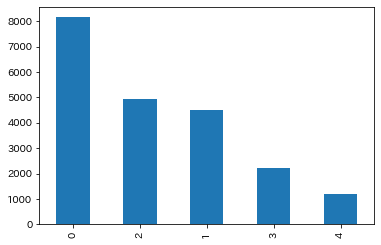

In [4]:
df.position=df.position+1
train['position'].value_counts().plot.bar()

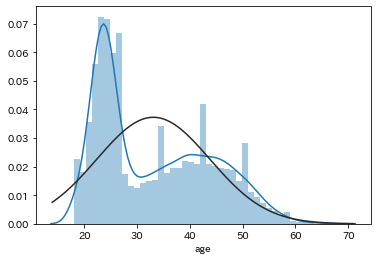

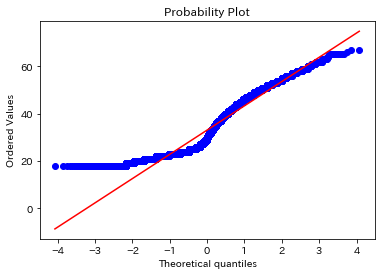

In [5]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df["age"].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df["age"], plot=plt)

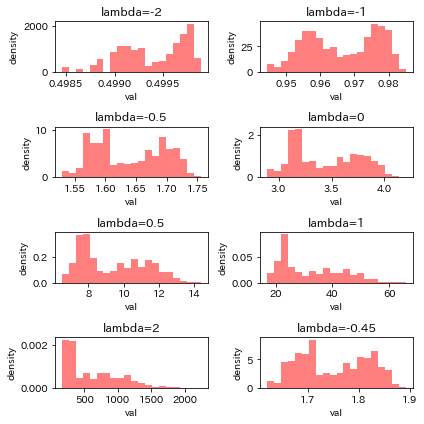

In [6]:

from scipy import stats

fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.age, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.age)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

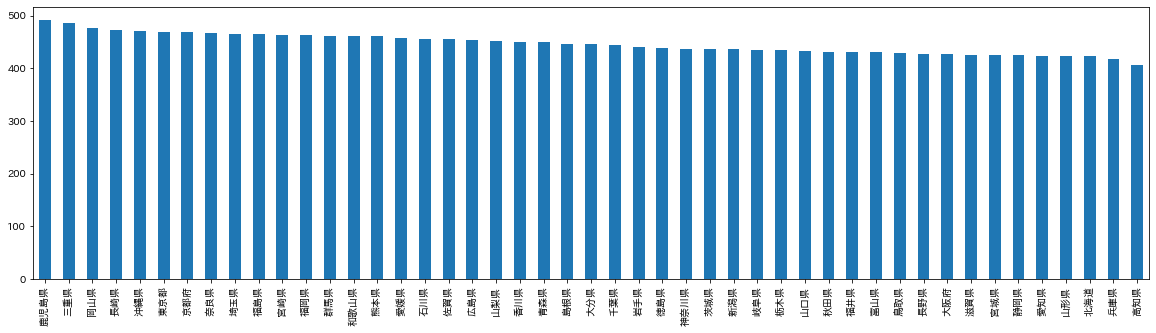

In [7]:
train['area'].value_counts().plot.bar(figsize=(20, 5))


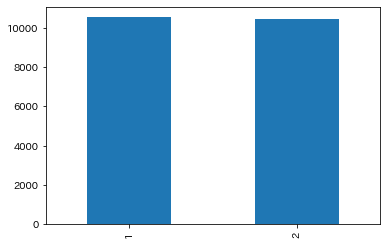

In [8]:
df.sex=df.sex-1
train['sex'].value_counts().plot.bar()

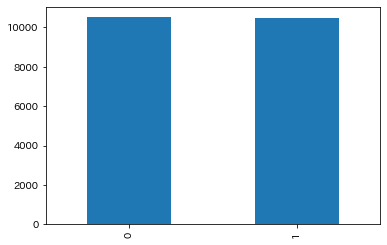

In [9]:
train['partner'].value_counts().plot.bar()

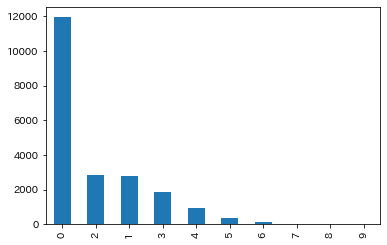

In [10]:
train['num_child'].value_counts().plot.bar()

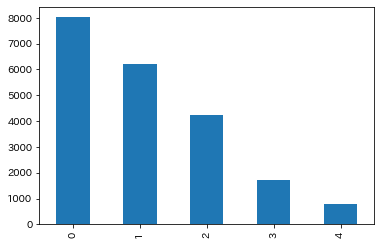

In [11]:
train['education'].value_counts().plot.bar()

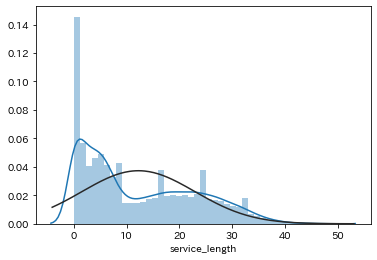

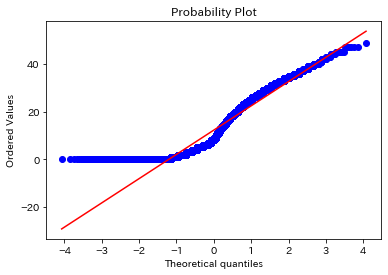

In [12]:
sns.distplot(df['service_length'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['service_length'], plot=plt)

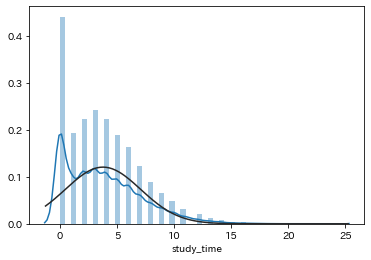

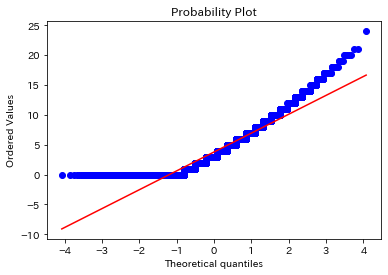

In [13]:


sns.distplot(df['study_time'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['study_time'], plot=plt)

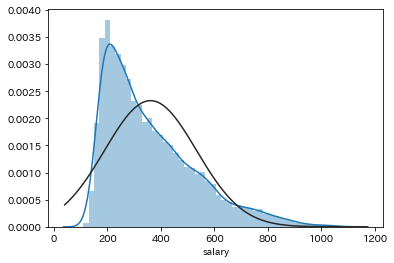

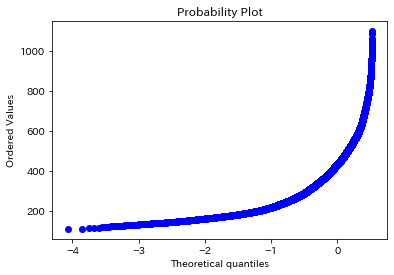

In [14]:
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

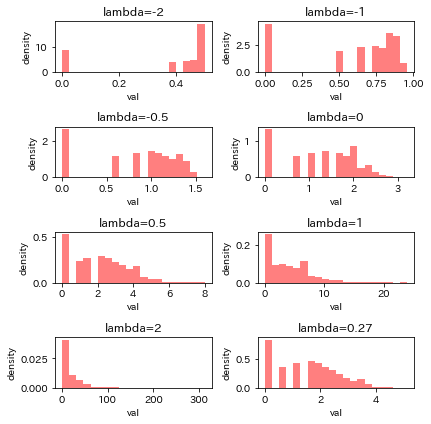

In [15]:
fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.study_time+1, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.study_time+1)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

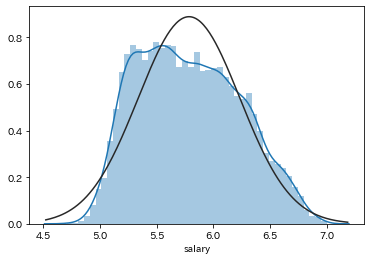

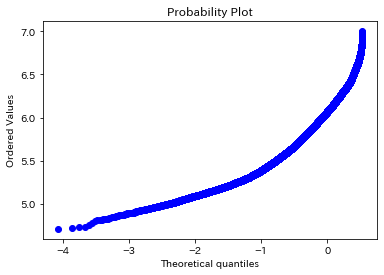

In [16]:
df.salary=np.log(df.salary)
#transformed histogram and normal probability plot
sns.distplot(df.salary.dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df.salary, plot=plt)

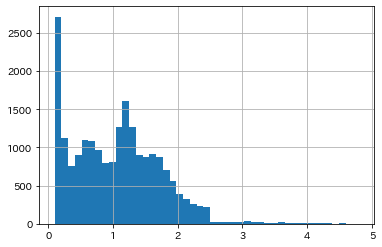

In [17]:
train['commute'].hist(bins=45)

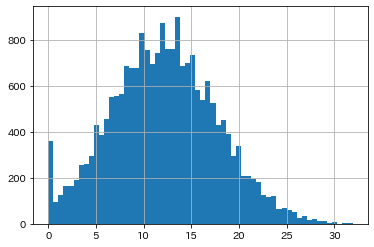

In [18]:
train['overtime'].hist(bins=60)

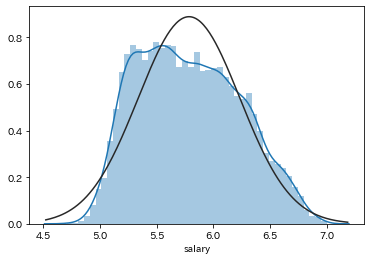

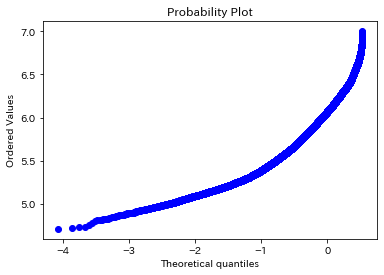

In [19]:


sns.distplot(df['salary'].dropna(), fit=norm);
fig = plt.figure()
res = stats.probplot(df['salary'], plot=plt)

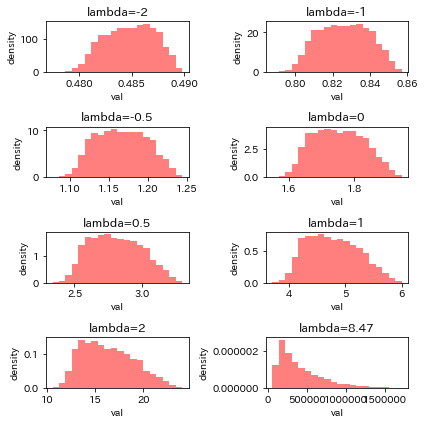

In [20]:
fig = plt.figure(figsize=(6.0, 6.0))
aaa=pd.DataFrame()
list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    aaa[ 'val_'+str(i) ] = stats.boxcox( df.salary, lmbda = i_lambda )
    fig.add_subplot(4, 2, i+1).hist(aaa['val_'+str(i)], bins=20, color='r', alpha=0.5, density=True)
    plt.title("lambda="+str(list_lambda[i]))
    plt.xlabel('val')
    plt.ylabel('density')

aaa[ 'val_auto' ], best_lambda = stats.boxcox( df.salary)
fig.add_subplot(4, 2, 8).hist(aaa['val_auto'], bins=20, color='r', alpha=0.5, density=True)
plt.title("lambda="+str(round(best_lambda, 2)))
plt.xlabel('val')
plt.ylabel('density')

fig.tight_layout()
fig.show()
plt.show()

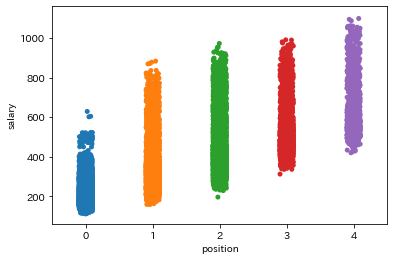

In [21]:
sns.stripplot(x="position",y="salary",data=train)#正の相関あり?

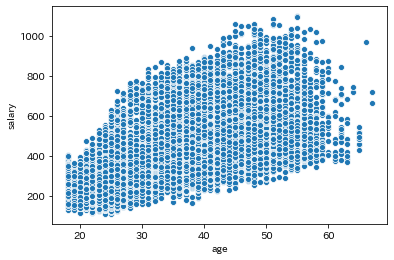

In [22]:
sns.scatterplot(x="age",y="salary",data=train)#正の相関

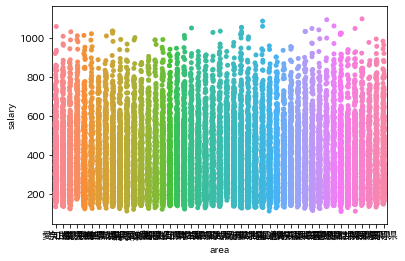

In [23]:
sns.stripplot(x="area",y="salary",data=train)#やや地域差はある

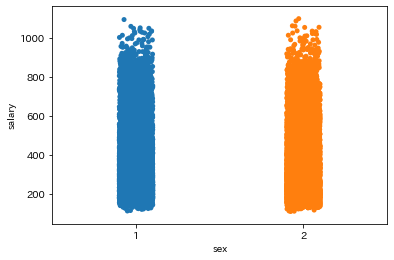

In [24]:
sns.stripplot(x="sex",y="salary",data=train)#そんなに性差はなさそう

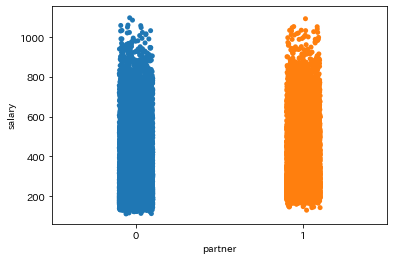

In [25]:
sns.stripplot(x="partner",y="salary",data=train)#正の相関

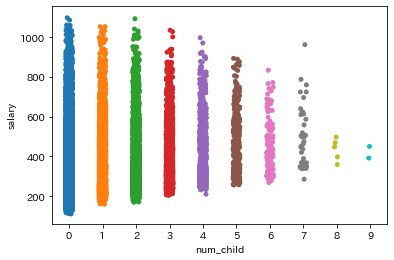

In [26]:
sns.stripplot(x="num_child",y="salary",data=train)#子が多くなるにつれて給与の幅が縮まりそう

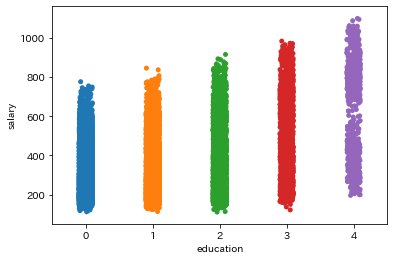

In [27]:
sns.stripplot(x="education",y="salary",data=train)#正の相関

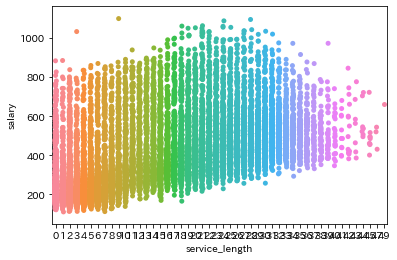

In [28]:
sns.stripplot(x="service_length",y="salary",data=train)#正の相関

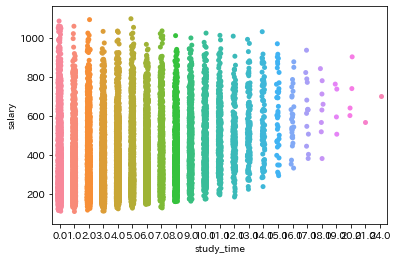

In [29]:
sns.stripplot(x="study_time",y="salary",data=train)#正の相関

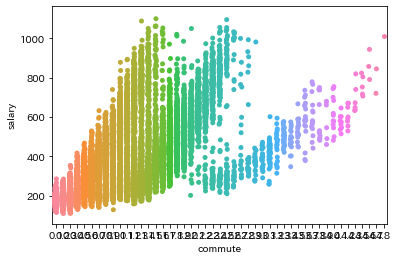

In [30]:
sns.stripplot(x="commute",y="salary",data=train)#意味不明

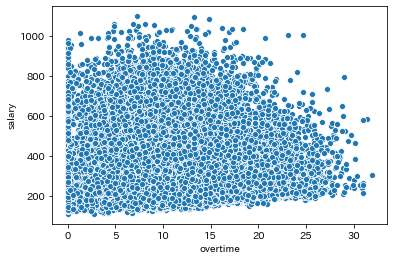

In [31]:
sns.scatterplot(x="overtime",y="salary",data=train)#正の相関

In [32]:
arealist=list(train.groupby("area").mean().salary.sort_values().index)
areadic={}
for i,area in enumerate(arealist):
    areadic[area]=i+1
df.area=df.area.map(areadic)

In [33]:
df["agexposition"]=df.age*df.position

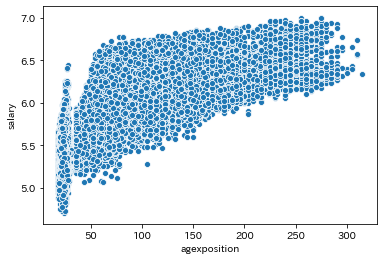

In [34]:
sns.scatterplot(x="agexposition",y="salary",data=df)

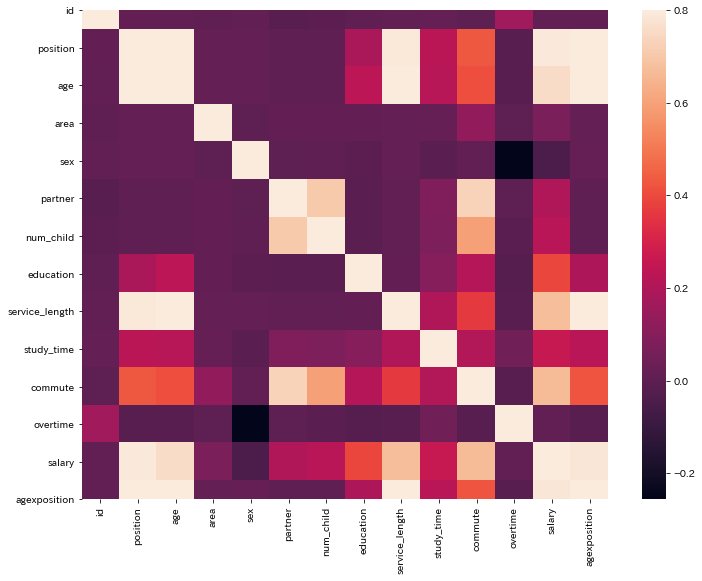

In [35]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV

train=df.dropna().drop("id",axis=1)
test=df[df.salary.isnull()].drop("id",axis=1)
test= test.drop(["salary",],axis=1)
X = train.drop(["salary"],axis=1)

#　目的変数に家賃単価を代入する
y = train.salary
train_X, valid_X,train_y, valid_y = train_test_split(X,y,test_size=0.2,random_state=43)

In [37]:
#重回帰分析
import sklearn
from sklearn.linear_model import LinearRegression as LR

model=LR()

model.fit(train_X, train_y)

linearpred=model.predict(valid_X)
model.score(valid_X,valid_y)

0.839090083593186

In [38]:
from sklearn.ensemble import RandomForestRegressor as RFR
import numpy as np
from sklearn.metrics import mean_absolute_error

rg = RFR(n_jobs=-1, random_state=2525)
 
rg.fit(train_X,train_y)
print(rg.score(valid_X,valid_y))
from sklearn.metrics import mean_squared_error
score=mean_absolute_error(np.exp(valid_y),np.exp(rg.predict(valid_X)))
print(f'MAE:{score:4f}')

0.9548630300752091
MAE:23.718493


In [ ]:
# 特徴量を選択して、複数のモデルで精度を調査する
from scipy.stats import mstats
from tqdm import tqdm

from sklearn import metrics, cross_validation, feature_selection, ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis, model_selection
from imblearn import under_sampling, over_sampling

models = [
 
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
 
    #Gaussian Processes
    gaussian_process.GaussianProcessRegressor(),
    
    #GLM
    linear_model.RidgeRegressor(),

    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
 
    #xgboost
    xgb.XGBRegressor
    
]
 
df_compare = pd.DataFrame(columns=['name', 'train_accuracy', 'valid_accuracy', 'time'])
scoring = ['mae']
 
for model in tqdm(models):
    
    name = model.__class__.__name__
    
    cv_rlts = model_selection.cross_validate(model, data_x_sample, data_y_sample, scoring=scoring, cv=10, return_train_score=True)
 
    for i in range(10):
        s = pd.Series([name, cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name=name+str(i))
        df_compare = df_compare.append(s)
        
plt.figure(figsize=(12,8))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h', color=base_color, linewidth=0.5, width=0.5)
plt.grid()
plt.show()

In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import optuna
from sklearn.metrics import r2_score

class RidgeCV():
    model_cls = Ridge

    def __init__(self, n_trials=100):
        self.n_trials = n_trials

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)
        elif isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
            y = y.reset_index(drop=True)

        self.X = X
        self.y = y

        study = optuna.create_study(direction='maximize')
        study.optimize(self, n_trials=self.n_trials)
        self.best_trial = study.best_trial

        print()
        print("Best score:", round(self.best_trial.value, 2))
        print("Best params:", self.best_trial.params)
        print()

        self.best_model = self.model_cls(**self.best_trial.params)
        self.best_model.fit(self.X, self.y)

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X.values.reshape(1, -1))
        elif isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        return self.best_model.predict(X)

    def score(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            y = pd.DataFrame(y)

        return self.best_model.score(X, y)

    def kfold_cv(self, model, splits=5):
        scores = []

        kf = KFold(n_splits=splits, shuffle=True)
        for train_index, test_index in kf.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            model.fit(X_train, y_train)
            scores.append(r2_score(model.predict(X_test), y_test))

        score = np.array(scores).mean()
        return score

import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

class XGBRegressorCV(RidgeCV):
    model_cls = xgb.XGBRegressor

    def __call__(self, trial):
        booster = trial.suggest_categorical('booster', ['gbtree', 'dart'])
        alpha = trial.suggest_loguniform('alpha', 1e-8, 1.0)

        max_depth = trial.suggest_int('max_depth', 1, 9)
        eta = trial.suggest_loguniform('eta', 1e-8, 1.0)
        gamma = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        grow_policy = trial.suggest_categorical(
            'grow_policy', ['depthwise', 'lossguide'])

        if booster == 'gbtree':
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy)
        elif booster == 'dart':
            sample_type = trial.suggest_categorical('sample_type',
                                                    ['uniform', 'weighted'])
            normalize_type = trial.suggest_categorical('normalize_type',
                                                       ['tree', 'forest'])
            rate_drop = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
            skip_drop = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)
            model = self.model_cls(silent=1, booster=booster,
                                   alpha=alpha, max_depth=max_depth, eta=eta,
                                   gamma=gamma, grow_policy=grow_policy,
                                   sample_type=sample_type,
                                   normalize_type=normalize_type,
                                   rate_drop=rate_drop, skip_drop=skip_drop)

        score = self.kfold_cv(model)
        return score

xgbr = XGBRegressorCV(n_trials=20)
# xgbr.fit(train_X, train_y)


In [66]:
import lightgbm as lgb
# from sklearn.metrics import log_loss

class LGBRegressorCV(RidgeCV):
    model_cls = lgb.LGBMRegressor
    def __call__(self, trial):
        params = {
            'loss_function': 'RMSE',
            'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 4, 20),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(**params)
        score = self.kfold_cv(model)
        return score

model=LGBRegressorCV()
model.fit(X,y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(model.predict(valid_X)))
print(f'MAE:{score:4f}')
pred=model.predict(test)


[I 2019-11-14 00:16:33,968] Finished trial#0 resulted in value: 0.9585206597015865. Current best value is 0.9585206597015865 with parameters: {'iterations': 74, 'depth': 11, 'learning_rate': 0.10854632459510717, 'random_strength': 100, 'bagging_temperature': 10.898120620267557, 'od_type': 'IncToDec', 'od_wait': 26}.
[I 2019-11-14 00:16:36,340] Finished trial#1 resulted in value: 0.9530470330639391. Current best value is 0.9585206597015865 with parameters: {'iterations': 74, 'depth': 11, 'learning_rate': 0.10854632459510717, 'random_strength': 100, 'bagging_temperature': 10.898120620267557, 'od_type': 'IncToDec', 'od_wait': 26}.
[I 2019-11-14 00:16:37,943] Finished trial#2 resulted in value: 0.9465245631118231. Current best value is 0.9585206597015865 with parameters: {'iterations': 74, 'depth': 11, 'learning_rate': 0.10854632459510717, 'random_strength': 100, 'bagging_temperature': 10.898120620267557, 'od_type': 'IncToDec', 'od_wait': 26}.
[I 2019-11-14 00:16:39,569] Finished trial#3 r

KeyboardInterrupt: 

In [68]:
from catboost import CatBoost
# from sklearn.metrics import log_loss

class CatRegressorCV(RidgeCV):
    model_cls = CatBoost
    def __call__(self, trial):
        params = {
            'loss_function': 'RMSE',
            'iterations' : trial.suggest_int('iterations', 50, 300),                      
            'depth' : trial.suggest_int('depth', 4, 16),                                      
            'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 1),               
            'random_strength' :trial.suggest_int('random_strength', 0, 100),                       
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00), 
            'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
            'od_wait' :trial.suggest_int('od_wait', 10, 50)
    }
        model=self.model_cls(params)
        score = self.kfold_cv(model)
        return score
model=CatRegressorCV()
model.fit(X,y)

pred_y=model.predict(valid_X)
score=mean_absolute_error(np.exp(valid_y),np.exp(model.predict(valid_X)))
print(f'MAE:{score:4f}')
pred=model.predict(test)

0:	learn: 0.2882908	total: 7.01ms	remaining: 1.4s
1:	learn: 0.2372281	total: 21.4ms	remaining: 2.12s
2:	learn: 0.2104530	total: 41.2ms	remaining: 2.71s
3:	learn: 0.1697088	total: 57.5ms	remaining: 2.82s
4:	learn: 0.1670645	total: 68.2ms	remaining: 2.66s
5:	learn: 0.1658384	total: 87.2ms	remaining: 2.82s
6:	learn: 0.1635928	total: 97.9ms	remaining: 2.7s
7:	learn: 0.1616846	total: 110ms	remaining: 2.65s
8:	learn: 0.1608077	total: 124ms	remaining: 2.62s
9:	learn: 0.1596506	total: 138ms	remaining: 2.62s
10:	learn: 0.1576167	total: 150ms	remaining: 2.58s
11:	learn: 0.1547479	total: 161ms	remaining: 2.52s
12:	learn: 0.1513143	total: 178ms	remaining: 2.57s
13:	learn: 0.1489569	total: 188ms	remaining: 2.5s
14:	learn: 0.1454970	total: 206ms	remaining: 2.54s
15:	learn: 0.1362086	total: 223ms	remaining: 2.56s
16:	learn: 0.1253819	total: 239ms	remaining: 2.57s
17:	learn: 0.1210024	total: 251ms	remaining: 2.53s
18:	learn: 0.1150419	total: 270ms	remaining: 2.57s
19:	learn: 0.1123682	total: 288ms	rem

161:	learn: 0.0598216	total: 2.29s	remaining: 537ms
162:	learn: 0.0597299	total: 2.3s	remaining: 523ms
163:	learn: 0.0596305	total: 2.32s	remaining: 508ms
164:	learn: 0.0595142	total: 2.33s	remaining: 494ms
165:	learn: 0.0594197	total: 2.34s	remaining: 479ms
166:	learn: 0.0592725	total: 2.35s	remaining: 465ms
167:	learn: 0.0590687	total: 2.37s	remaining: 451ms
168:	learn: 0.0589592	total: 2.38s	remaining: 436ms
169:	learn: 0.0588729	total: 2.39s	remaining: 422ms
170:	learn: 0.0586686	total: 2.4s	remaining: 408ms
171:	learn: 0.0585213	total: 2.42s	remaining: 394ms
172:	learn: 0.0584399	total: 2.43s	remaining: 379ms
173:	learn: 0.0583818	total: 2.44s	remaining: 365ms
174:	learn: 0.0583150	total: 2.45s	remaining: 350ms
175:	learn: 0.0580691	total: 2.46s	remaining: 336ms
176:	learn: 0.0579185	total: 2.47s	remaining: 321ms
177:	learn: 0.0578308	total: 2.48s	remaining: 306ms
178:	learn: 0.0576621	total: 2.49s	remaining: 293ms
179:	learn: 0.0575312	total: 2.5s	remaining: 278ms
180:	learn: 0.0

121:	learn: 0.0670295	total: 1.53s	remaining: 981ms
122:	learn: 0.0668843	total: 1.54s	remaining: 965ms
123:	learn: 0.0666313	total: 1.55s	remaining: 950ms
124:	learn: 0.0664727	total: 1.56s	remaining: 934ms
125:	learn: 0.0664246	total: 1.56s	remaining: 919ms
126:	learn: 0.0661553	total: 1.57s	remaining: 903ms
127:	learn: 0.0660570	total: 1.58s	remaining: 889ms
128:	learn: 0.0658665	total: 1.59s	remaining: 874ms
129:	learn: 0.0655966	total: 1.6s	remaining: 860ms
130:	learn: 0.0653474	total: 1.6s	remaining: 845ms
131:	learn: 0.0652156	total: 1.61s	remaining: 831ms
132:	learn: 0.0649618	total: 1.62s	remaining: 816ms
133:	learn: 0.0648947	total: 1.63s	remaining: 801ms
134:	learn: 0.0647690	total: 1.63s	remaining: 787ms
135:	learn: 0.0645787	total: 1.64s	remaining: 773ms
136:	learn: 0.0643590	total: 1.65s	remaining: 759ms
137:	learn: 0.0640734	total: 1.66s	remaining: 745ms
138:	learn: 0.0638007	total: 1.67s	remaining: 732ms
139:	learn: 0.0636178	total: 1.69s	remaining: 722ms
140:	learn: 0.

81:	learn: 0.0739635	total: 1.17s	remaining: 1.68s
82:	learn: 0.0736598	total: 1.19s	remaining: 1.68s
83:	learn: 0.0734590	total: 1.2s	remaining: 1.66s
84:	learn: 0.0732943	total: 1.22s	remaining: 1.64s
85:	learn: 0.0730912	total: 1.24s	remaining: 1.64s
86:	learn: 0.0728135	total: 1.25s	remaining: 1.63s
87:	learn: 0.0724685	total: 1.26s	remaining: 1.61s
88:	learn: 0.0722217	total: 1.27s	remaining: 1.59s
89:	learn: 0.0718725	total: 1.29s	remaining: 1.58s
90:	learn: 0.0716896	total: 1.3s	remaining: 1.56s
91:	learn: 0.0713487	total: 1.31s	remaining: 1.54s
92:	learn: 0.0710589	total: 1.33s	remaining: 1.53s
93:	learn: 0.0708599	total: 1.34s	remaining: 1.51s
94:	learn: 0.0706458	total: 1.35s	remaining: 1.5s
95:	learn: 0.0703399	total: 1.37s	remaining: 1.48s
96:	learn: 0.0701706	total: 1.38s	remaining: 1.47s
97:	learn: 0.0700214	total: 1.4s	remaining: 1.46s
98:	learn: 0.0698756	total: 1.41s	remaining: 1.44s
99:	learn: 0.0697809	total: 1.43s	remaining: 1.43s
100:	learn: 0.0696394	total: 1.44s	

41:	learn: 0.0890130	total: 588ms	remaining: 2.21s
42:	learn: 0.0881308	total: 601ms	remaining: 2.19s
43:	learn: 0.0873538	total: 615ms	remaining: 2.18s
44:	learn: 0.0868687	total: 627ms	remaining: 2.16s
45:	learn: 0.0865435	total: 640ms	remaining: 2.14s
46:	learn: 0.0859708	total: 654ms	remaining: 2.13s
47:	learn: 0.0854970	total: 667ms	remaining: 2.11s
48:	learn: 0.0849975	total: 683ms	remaining: 2.1s
49:	learn: 0.0849467	total: 696ms	remaining: 2.09s
50:	learn: 0.0845365	total: 709ms	remaining: 2.07s
51:	learn: 0.0841965	total: 723ms	remaining: 2.06s
52:	learn: 0.0838342	total: 735ms	remaining: 2.04s
53:	learn: 0.0833825	total: 747ms	remaining: 2.02s
54:	learn: 0.0829392	total: 763ms	remaining: 2.01s
55:	learn: 0.0823749	total: 775ms	remaining: 1.99s
56:	learn: 0.0820955	total: 789ms	remaining: 1.98s
57:	learn: 0.0817120	total: 804ms	remaining: 1.97s
58:	learn: 0.0813143	total: 819ms	remaining: 1.96s
59:	learn: 0.0812988	total: 832ms	remaining: 1.94s
60:	learn: 0.0809515	total: 847m

1:	learn: 0.2539078	total: 19.2ms	remaining: 1.9s
2:	learn: 0.2242194	total: 33ms	remaining: 2.17s
3:	learn: 0.1833789	total: 44.8ms	remaining: 2.19s
4:	learn: 0.1803269	total: 58.3ms	remaining: 2.27s
5:	learn: 0.1789147	total: 71.7ms	remaining: 2.32s
6:	learn: 0.1759459	total: 78.7ms	remaining: 2.17s
7:	learn: 0.1734506	total: 92.9ms	remaining: 2.23s
8:	learn: 0.1722698	total: 105ms	remaining: 2.23s
9:	learn: 0.1711247	total: 118ms	remaining: 2.24s
10:	learn: 0.1691005	total: 126ms	remaining: 2.17s
11:	learn: 0.1670294	total: 135ms	remaining: 2.12s
12:	learn: 0.1565757	total: 144ms	remaining: 2.07s
13:	learn: 0.1534946	total: 154ms	remaining: 2.04s
14:	learn: 0.1501508	total: 166ms	remaining: 2.05s
15:	learn: 0.1437590	total: 178ms	remaining: 2.05s
16:	learn: 0.1308321	total: 189ms	remaining: 2.03s
17:	learn: 0.1222728	total: 199ms	remaining: 2.01s
18:	learn: 0.1185422	total: 210ms	remaining: 2s
19:	learn: 0.1153717	total: 221ms	remaining: 1.99s
20:	learn: 0.1120745	total: 232ms	remai

162:	learn: 0.0594879	total: 2.17s	remaining: 492ms
163:	learn: 0.0593757	total: 2.18s	remaining: 479ms
164:	learn: 0.0592679	total: 2.19s	remaining: 466ms
165:	learn: 0.0591188	total: 2.21s	remaining: 452ms
166:	learn: 0.0588906	total: 2.22s	remaining: 439ms
167:	learn: 0.0587685	total: 2.24s	remaining: 426ms
168:	learn: 0.0585213	total: 2.25s	remaining: 413ms
169:	learn: 0.0583658	total: 2.27s	remaining: 400ms
170:	learn: 0.0582448	total: 2.28s	remaining: 387ms
171:	learn: 0.0581582	total: 2.29s	remaining: 373ms
172:	learn: 0.0580510	total: 2.3s	remaining: 359ms
173:	learn: 0.0579651	total: 2.31s	remaining: 345ms
174:	learn: 0.0579098	total: 2.32s	remaining: 331ms
175:	learn: 0.0577904	total: 2.33s	remaining: 318ms
176:	learn: 0.0577319	total: 2.34s	remaining: 304ms
177:	learn: 0.0575771	total: 2.35s	remaining: 291ms
178:	learn: 0.0574637	total: 2.37s	remaining: 278ms
179:	learn: 0.0573174	total: 2.38s	remaining: 264ms
180:	learn: 0.0571948	total: 2.39s	remaining: 251ms
181:	learn: 0

[I 2019-11-14 00:18:24,166] Finished trial#0 resulted in value: 0.9440811167326485. Current best value is 0.9440811167326485 with parameters: {'iterations': 200, 'depth': 8, 'learning_rate': 0.8664329472942578, 'random_strength': 96, 'bagging_temperature': 3.15906707245254, 'od_type': 'Iter', 'od_wait': 50}.


0:	learn: 0.3168535	total: 7.27ms	remaining: 2.14s
1:	learn: 0.2162163	total: 31.2ms	remaining: 4.58s
2:	learn: 0.1948440	total: 37.4ms	remaining: 3.64s
3:	learn: 0.1756987	total: 57.1ms	remaining: 4.16s
4:	learn: 0.1628133	total: 79.4ms	remaining: 4.6s
5:	learn: 0.1574487	total: 102ms	remaining: 4.89s
6:	learn: 0.1523833	total: 122ms	remaining: 5.04s
7:	learn: 0.1478734	total: 177ms	remaining: 6.35s
8:	learn: 0.1449723	total: 223ms	remaining: 7.1s
9:	learn: 0.1406190	total: 248ms	remaining: 7.08s
10:	learn: 0.1375802	total: 270ms	remaining: 6.97s
11:	learn: 0.1365685	total: 278ms	remaining: 6.57s
12:	learn: 0.1351432	total: 302ms	remaining: 6.55s
13:	learn: 0.1349413	total: 321ms	remaining: 6.43s
14:	learn: 0.1340456	total: 349ms	remaining: 6.51s
15:	learn: 0.1316934	total: 371ms	remaining: 6.48s
16:	learn: 0.1287923	total: 411ms	remaining: 6.73s
17:	learn: 0.1279218	total: 422ms	remaining: 6.49s
18:	learn: 0.1263791	total: 444ms	remaining: 6.44s
19:	learn: 0.1234064	total: 466ms	rema

161:	learn: 0.0502538	total: 3.47s	remaining: 2.85s
162:	learn: 0.0499938	total: 3.5s	remaining: 2.83s
163:	learn: 0.0498239	total: 3.52s	remaining: 2.81s
164:	learn: 0.0497328	total: 3.54s	remaining: 2.79s
165:	learn: 0.0495370	total: 3.56s	remaining: 2.77s
166:	learn: 0.0493444	total: 3.58s	remaining: 2.74s
167:	learn: 0.0492417	total: 3.6s	remaining: 2.72s
168:	learn: 0.0490732	total: 3.62s	remaining: 2.7s
169:	learn: 0.0489198	total: 3.65s	remaining: 2.68s
170:	learn: 0.0488092	total: 3.67s	remaining: 2.66s
171:	learn: 0.0486446	total: 3.69s	remaining: 2.64s
172:	learn: 0.0485347	total: 3.72s	remaining: 2.63s
173:	learn: 0.0483927	total: 3.75s	remaining: 2.6s
174:	learn: 0.0482384	total: 3.77s	remaining: 2.58s
175:	learn: 0.0480971	total: 3.79s	remaining: 2.56s
176:	learn: 0.0479963	total: 3.81s	remaining: 2.54s
177:	learn: 0.0479063	total: 3.83s	remaining: 2.52s
178:	learn: 0.0477944	total: 3.85s	remaining: 2.5s
179:	learn: 0.0476736	total: 3.88s	remaining: 2.48s
180:	learn: 0.047

25:	learn: 0.0980410	total: 648ms	remaining: 6.7s
26:	learn: 0.0964977	total: 672ms	remaining: 6.67s
27:	learn: 0.0950088	total: 700ms	remaining: 6.67s
28:	learn: 0.0936495	total: 722ms	remaining: 6.63s
29:	learn: 0.0920725	total: 749ms	remaining: 6.62s
30:	learn: 0.0907513	total: 779ms	remaining: 6.63s
31:	learn: 0.0900367	total: 806ms	remaining: 6.63s
32:	learn: 0.0892613	total: 837ms	remaining: 6.64s
33:	learn: 0.0881732	total: 870ms	remaining: 6.67s
34:	learn: 0.0875867	total: 893ms	remaining: 6.63s
35:	learn: 0.0869294	total: 922ms	remaining: 6.63s
36:	learn: 0.0862064	total: 952ms	remaining: 6.63s
37:	learn: 0.0856530	total: 981ms	remaining: 6.63s
38:	learn: 0.0853136	total: 1.02s	remaining: 6.7s
39:	learn: 0.0841261	total: 1.06s	remaining: 6.77s
40:	learn: 0.0836331	total: 1.09s	remaining: 6.77s
41:	learn: 0.0830451	total: 1.12s	remaining: 6.75s
42:	learn: 0.0824494	total: 1.15s	remaining: 6.76s
43:	learn: 0.0816351	total: 1.18s	remaining: 6.74s
44:	learn: 0.0811418	total: 1.21s

185:	learn: 0.0455739	total: 5.01s	remaining: 2.93s
186:	learn: 0.0454670	total: 5.03s	remaining: 2.91s
187:	learn: 0.0452919	total: 5.06s	remaining: 2.88s
188:	learn: 0.0451353	total: 5.09s	remaining: 2.85s
189:	learn: 0.0449885	total: 5.12s	remaining: 2.83s
190:	learn: 0.0448478	total: 5.14s	remaining: 2.8s
191:	learn: 0.0446999	total: 5.17s	remaining: 2.77s
192:	learn: 0.0445980	total: 5.2s	remaining: 2.75s
193:	learn: 0.0444200	total: 5.22s	remaining: 2.72s
194:	learn: 0.0443640	total: 5.25s	remaining: 2.69s
195:	learn: 0.0442617	total: 5.27s	remaining: 2.66s
196:	learn: 0.0441973	total: 5.3s	remaining: 2.64s
197:	learn: 0.0440614	total: 5.33s	remaining: 2.61s
198:	learn: 0.0439911	total: 5.36s	remaining: 2.59s
199:	learn: 0.0438363	total: 5.39s	remaining: 2.56s
200:	learn: 0.0437500	total: 5.42s	remaining: 2.53s
201:	learn: 0.0436180	total: 5.44s	remaining: 2.5s
202:	learn: 0.0435230	total: 5.47s	remaining: 2.48s
203:	learn: 0.0434382	total: 5.5s	remaining: 2.45s
204:	learn: 0.043

50:	learn: 0.0773013	total: 1.39s	remaining: 6.67s
51:	learn: 0.0770960	total: 1.42s	remaining: 6.64s
52:	learn: 0.0766865	total: 1.45s	remaining: 6.61s
53:	learn: 0.0764436	total: 1.48s	remaining: 6.59s
54:	learn: 0.0757819	total: 1.5s	remaining: 6.56s
55:	learn: 0.0752669	total: 1.53s	remaining: 6.54s
56:	learn: 0.0747814	total: 1.56s	remaining: 6.51s
57:	learn: 0.0745198	total: 1.58s	remaining: 6.48s
58:	learn: 0.0742354	total: 1.61s	remaining: 6.44s
59:	learn: 0.0737556	total: 1.64s	remaining: 6.41s
60:	learn: 0.0733610	total: 1.67s	remaining: 6.39s
61:	learn: 0.0730624	total: 1.69s	remaining: 6.36s
62:	learn: 0.0727099	total: 1.72s	remaining: 6.32s
63:	learn: 0.0723075	total: 1.74s	remaining: 6.29s
64:	learn: 0.0720041	total: 1.77s	remaining: 6.26s
65:	learn: 0.0717868	total: 1.79s	remaining: 6.23s
66:	learn: 0.0711366	total: 1.82s	remaining: 6.21s
67:	learn: 0.0708727	total: 1.85s	remaining: 6.18s
68:	learn: 0.0704115	total: 1.88s	remaining: 6.16s
69:	learn: 0.0701864	total: 1.91

209:	learn: 0.0431472	total: 5.51s	remaining: 2.23s
210:	learn: 0.0430899	total: 5.53s	remaining: 2.2s
211:	learn: 0.0430124	total: 5.55s	remaining: 2.17s
212:	learn: 0.0428281	total: 5.58s	remaining: 2.15s
213:	learn: 0.0426750	total: 5.6s	remaining: 2.12s
214:	learn: 0.0425607	total: 5.63s	remaining: 2.09s
215:	learn: 0.0424055	total: 5.65s	remaining: 2.07s
216:	learn: 0.0422922	total: 5.68s	remaining: 2.04s
217:	learn: 0.0421378	total: 5.7s	remaining: 2.01s
218:	learn: 0.0420105	total: 5.72s	remaining: 1.99s
219:	learn: 0.0419236	total: 5.75s	remaining: 1.96s
220:	learn: 0.0417889	total: 5.77s	remaining: 1.93s
221:	learn: 0.0416003	total: 5.79s	remaining: 1.91s
222:	learn: 0.0414115	total: 5.82s	remaining: 1.88s
223:	learn: 0.0413215	total: 5.85s	remaining: 1.85s
224:	learn: 0.0412342	total: 5.87s	remaining: 1.83s
225:	learn: 0.0412338	total: 5.89s	remaining: 1.8s
226:	learn: 0.0410872	total: 5.92s	remaining: 1.77s
227:	learn: 0.0409462	total: 5.95s	remaining: 1.75s
228:	learn: 0.04

74:	learn: 0.0683558	total: 1.88s	remaining: 5.51s
75:	learn: 0.0678745	total: 1.91s	remaining: 5.49s
76:	learn: 0.0676671	total: 1.93s	remaining: 5.46s
77:	learn: 0.0676160	total: 1.96s	remaining: 5.44s
78:	learn: 0.0673110	total: 1.98s	remaining: 5.43s
79:	learn: 0.0670584	total: 2.01s	remaining: 5.4s
80:	learn: 0.0666261	total: 2.04s	remaining: 5.38s
81:	learn: 0.0662675	total: 2.06s	remaining: 5.36s
82:	learn: 0.0659339	total: 2.09s	remaining: 5.33s
83:	learn: 0.0653605	total: 2.11s	remaining: 5.3s
84:	learn: 0.0649411	total: 2.14s	remaining: 5.28s
85:	learn: 0.0646070	total: 2.16s	remaining: 5.25s
86:	learn: 0.0644582	total: 2.19s	remaining: 5.24s
87:	learn: 0.0642036	total: 2.22s	remaining: 5.22s
88:	learn: 0.0639836	total: 2.24s	remaining: 5.2s
89:	learn: 0.0635474	total: 2.27s	remaining: 5.16s
90:	learn: 0.0635169	total: 2.29s	remaining: 5.14s
91:	learn: 0.0632929	total: 2.32s	remaining: 5.11s
92:	learn: 0.0632202	total: 2.34s	remaining: 5.09s
93:	learn: 0.0629869	total: 2.37s	

233:	learn: 0.0403025	total: 6.15s	remaining: 1.6s
234:	learn: 0.0401839	total: 6.18s	remaining: 1.58s
235:	learn: 0.0400744	total: 6.21s	remaining: 1.55s
236:	learn: 0.0399001	total: 6.25s	remaining: 1.53s
237:	learn: 0.0396777	total: 6.29s	remaining: 1.51s
238:	learn: 0.0395907	total: 6.34s	remaining: 1.49s
239:	learn: 0.0394330	total: 6.37s	remaining: 1.46s
240:	learn: 0.0393621	total: 6.39s	remaining: 1.43s
241:	learn: 0.0392051	total: 6.42s	remaining: 1.41s
242:	learn: 0.0390230	total: 6.46s	remaining: 1.38s
243:	learn: 0.0389240	total: 6.49s	remaining: 1.36s
244:	learn: 0.0389063	total: 6.52s	remaining: 1.33s
245:	learn: 0.0388220	total: 6.55s	remaining: 1.3s
246:	learn: 0.0387653	total: 6.58s	remaining: 1.28s
247:	learn: 0.0386207	total: 6.6s	remaining: 1.25s
248:	learn: 0.0385453	total: 6.63s	remaining: 1.23s
249:	learn: 0.0384692	total: 6.67s	remaining: 1.2s
250:	learn: 0.0384362	total: 6.7s	remaining: 1.17s
251:	learn: 0.0383522	total: 6.72s	remaining: 1.15s
252:	learn: 0.038

99:	learn: 0.0631797	total: 2.81s	remaining: 5.48s
100:	learn: 0.0628616	total: 2.84s	remaining: 5.45s
101:	learn: 0.0628516	total: 2.87s	remaining: 5.42s
102:	learn: 0.0626320	total: 2.89s	remaining: 5.39s
103:	learn: 0.0623354	total: 2.92s	remaining: 5.36s
104:	learn: 0.0619229	total: 2.95s	remaining: 5.33s
105:	learn: 0.0617925	total: 2.97s	remaining: 5.3s
106:	learn: 0.0615239	total: 3s	remaining: 5.27s
107:	learn: 0.0611012	total: 3.03s	remaining: 5.24s
108:	learn: 0.0608768	total: 3.05s	remaining: 5.21s
109:	learn: 0.0606621	total: 3.08s	remaining: 5.17s
110:	learn: 0.0602464	total: 3.1s	remaining: 5.14s
111:	learn: 0.0599158	total: 3.13s	remaining: 5.11s
112:	learn: 0.0597504	total: 3.16s	remaining: 5.09s
113:	learn: 0.0596983	total: 3.19s	remaining: 5.06s
114:	learn: 0.0596755	total: 3.19s	remaining: 5s
115:	learn: 0.0595535	total: 3.23s	remaining: 4.98s
116:	learn: 0.0592235	total: 3.25s	remaining: 4.95s
117:	learn: 0.0589857	total: 3.28s	remaining: 4.92s
118:	learn: 0.0588619

258:	learn: 0.0383430	total: 7.3s	remaining: 1.01s
259:	learn: 0.0382265	total: 7.33s	remaining: 986ms
260:	learn: 0.0381721	total: 7.36s	remaining: 958ms
261:	learn: 0.0380983	total: 7.39s	remaining: 931ms
262:	learn: 0.0379181	total: 7.42s	remaining: 902ms
263:	learn: 0.0378502	total: 7.44s	remaining: 874ms
264:	learn: 0.0377177	total: 7.47s	remaining: 846ms
265:	learn: 0.0376421	total: 7.5s	remaining: 817ms
266:	learn: 0.0374829	total: 7.52s	remaining: 789ms
267:	learn: 0.0373899	total: 7.55s	remaining: 761ms
268:	learn: 0.0372739	total: 7.58s	remaining: 733ms
269:	learn: 0.0371873	total: 7.61s	remaining: 705ms
270:	learn: 0.0370455	total: 7.64s	remaining: 677ms
271:	learn: 0.0369195	total: 7.67s	remaining: 649ms
272:	learn: 0.0368260	total: 7.7s	remaining: 621ms
273:	learn: 0.0367417	total: 7.73s	remaining: 593ms
274:	learn: 0.0366120	total: 7.76s	remaining: 565ms
275:	learn: 0.0365591	total: 7.8s	remaining: 537ms
276:	learn: 0.0364622	total: 7.83s	remaining: 509ms
277:	learn: 0.03

[I 2019-11-14 00:19:07,562] Finished trial#1 resulted in value: 0.9476687113467321. Current best value is 0.9476687113467321 with parameters: {'iterations': 295, 'depth': 10, 'learning_rate': 0.573874300137266, 'random_strength': 25, 'bagging_temperature': 7.0470356500506695, 'od_type': 'IncToDec', 'od_wait': 31}.


0:	learn: 0.4448478	total: 8.93ms	remaining: 1.29s
1:	learn: 0.4386036	total: 42.6ms	remaining: 3.07s
2:	learn: 0.4331427	total: 255ms	remaining: 12.1s
3:	learn: 0.4268269	total: 547ms	remaining: 19.4s
4:	learn: 0.4198441	total: 865ms	remaining: 24.4s
5:	learn: 0.4154068	total: 875ms	remaining: 20.4s
6:	learn: 0.4100684	total: 1.21s	remaining: 24.1s
7:	learn: 0.4043783	total: 1.25s	remaining: 21.5s
8:	learn: 0.3993738	total: 1.55s	remaining: 23.7s
9:	learn: 0.3935610	total: 1.66s	remaining: 22.6s
10:	learn: 0.3890710	total: 1.67s	remaining: 20.5s
11:	learn: 0.3840461	total: 1.95s	remaining: 21.8s
12:	learn: 0.3786273	total: 2.25s	remaining: 23s
13:	learn: 0.3737852	total: 2.27s	remaining: 21.4s
14:	learn: 0.3692709	total: 2.3s	remaining: 20.1s
15:	learn: 0.3636293	total: 2.6s	remaining: 21.1s
16:	learn: 0.3594669	total: 2.8s	remaining: 21.2s
17:	learn: 0.3540982	total: 3.05s	remaining: 21.7s
18:	learn: 0.3489766	total: 3.35s	remaining: 22.4s
19:	learn: 0.3447597	total: 3.57s	remaining:

KeyboardInterrupt: 

In [224]:
from sklearn.preprocessing import StandardScaler
categorical_variable_names = ["position","sex","education"]
# カテゴリ変数に一括変換
x_dummy = pd.get_dummies(df[categorical_variable_names], drop_first=True,columns=categorical_variable_names)
X_nn=df.drop(categorical_variable_names, axis=1)
sscaler =StandardScaler()
sscaler.fit(X_nn)  

x_datas_std =sscaler.transform(X_nn)
x_datas_std = pd.DataFrame(x_datas_std, columns=X_nn.columns)
X_nn= pd.concat([x_datas_std, x_dummy.reset_index(drop=True)], axis=1)

train_X_nn=X_nn.dropna().drop("id",axis=1)
test_nn=X_nn[X_nn.salary.isnull()].drop("id",axis=1)
test_nn= test_nn.drop(["salary",],axis=1)
X_nn= train_nn.drop(["salary"],axis=1)

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
# tensorflowの警告抑制
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# xgboostによるモデル
class Model1Xgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = XGBRegressorCV(n_trials=20)
        self.model.fit(tr_x,tr_y)

    def predict(self, x):
        data = x
        pred = self.model.predict(data)
        return pred

# LightGBMによるモデル
class Model1lgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model=LGBRegressorCV(n_trials=20)
        self.model.fit(tr_x,tr_y)

    def predict(self, x):
        data = x
        pred = self.model.predict(data)
        return pred

class Model1cat:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model=CatRegressorCV(n_trials=40)
        self.model.fit(tr_x,tr_y)

    def predict(self, x):
        data = x
        pred = self.model.predict(data)
        return pred    

# 線形モデル
class Model2Linear:

    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.model = Ridge()
        self.model.fit(tr_x, tr_y)

    def predict(self, x):

        pred = self.model.predict(x)
        return pred

# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd


# ---------------------------------
# スタッキング
# ----------------------------------
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# models.pyにModel1Xgb, Model1NN, Model2Linearを定義しているものとする
# 各クラスは、fitで学習し、predictで予測値の確率を出力する


# 学習データに対する「目的変数を知らない」予測値と、テストデータに対する予測値を返す関数
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test


# 1層目のモデル
# pred_train_1a, pred_train_1bは、学習データのクロスバリデーションでの予測値
# pred_test_1a, pred_test_1bは、テストデータの予測値
model_1a = Model1Xgb()
pred_train_1a, pred_test_1a = predict_cv(model_1a, X, y, test)

model_1b = Model1lgb()
pred_train_1b, pred_test_1b = predict_cv(model_1b, X, y, test)

# 1層目のモデルの評価
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1a))}')
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_1b))}')

# 予測値を特徴量としてデータフレームを作成
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b})
test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b})

# 2層目のモデル
# pred_train_2は、2層目のモデルの学習データのクロスバリデーションでの予測値
# pred_test_2は、2層目のモデルのテストデータの予測値
model_2 = Model2Linear()
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, y, test_x_2)
print(f'logloss: {mean_absolute_error(np.exp(y),np.exp( pred_train_2))}')

[I 2019-11-14 00:19:43,321] Finished trial#0 resulted in value: 0.9439186360177146. Current best value is 0.9439186360177146 with parameters: {'booster': 'gbtree', 'alpha': 0.00010212942880214386, 'max_depth': 4, 'eta': 0.00015962284070154294, 'gamma': 0.025321685661323975, 'grow_policy': 'depthwise'}.
[I 2019-11-14 00:19:51,543] Finished trial#1 resulted in value: 0.9570123674412695. Current best value is 0.9570123674412695 with parameters: {'booster': 'gbtree', 'alpha': 3.548791198940024e-05, 'max_depth': 9, 'eta': 0.3675302721804142, 'gamma': 2.5286425972747975e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-14 00:19:58,035] Finished trial#2 resulted in value: 0.9566259794251503. Current best value is 0.9570123674412695 with parameters: {'booster': 'gbtree', 'alpha': 3.548791198940024e-05, 'max_depth': 9, 'eta': 0.3675302721804142, 'gamma': 2.5286425972747975e-08, 'grow_policy': 'lossguide'}.
[I 2019-11-14 00:20:06,124] Finished trial#3 resulted in value: 0.8106628232113506. Current be

In [260]:
len(pred_test_2)

9000

In [51]:
pred=np.exp(pred_test_2)

In [194]:
xgbr.fit(X, y)

pred=np.exp(xgbr.predict(test))

[I 2019-11-13 16:37:37,439] Finished trial#0 resulted in value: 0.9089870752721346. Current best value is 0.9089870752721346 with parameters: {'booster': 'dart', 'alpha': 3.5243702785803555e-08, 'max_depth': 2, 'eta': 0.020954954182432813, 'gamma': 6.6580359070594265e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.009837547444526595, 'skip_drop': 0.08231429796316754}.
[I 2019-11-13 16:37:44,656] Finished trial#1 resulted in value: 0.9585372334153813. Current best value is 0.9585372334153813 with parameters: {'booster': 'gbtree', 'alpha': 0.028931051791130723, 'max_depth': 6, 'eta': 0.00010703617500753365, 'gamma': 2.9366362160029843e-05, 'grow_policy': 'depthwise'}.
[I 2019-11-13 16:37:46,728] Finished trial#2 resulted in value: 0.8568819582609267. Current best value is 0.9585372334153813 with parameters: {'booster': 'gbtree', 'alpha': 0.028931051791130723, 'max_depth': 6, 'eta': 0.00010703617500753365, 'gamma': 2.9366362160029843e-


Best score: 0.96
Best params: {'booster': 'dart', 'alpha': 0.0007852505862073227, 'max_depth': 9, 'eta': 2.0328451395162648e-08, 'gamma': 1.663812571437705e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.3198421751709013e-07, 'skip_drop': 2.8456910056043334e-07}

[16:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
sub = pd.DataFrame(pd.read_csv("test_data.csv")['id'])
sub["y"] = list(pred)
sub.to_csv("submission.csv", index = False)

array([522.51654707, 265.16191919, 205.98771108, ..., 509.76707723,
       139.1592873 , 632.49789718])